<a href="https://colab.research.google.com/github/IrmaGalijasevic/DataAnalysis/blob/main/ProjectTask2/VIS23_Z2_TIM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALIZA SLEEP HEALTH AND LIFESTYLE DATASETA**

**Članovi grupe su zajedno radili na izradi zadataka.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import os
import re
import io
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import chi2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (11).csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['Sleep_health_and_lifestyle_dataset.csv']))
data1 = dataset.copy()

U sklopu ove zadaće, odabrali smo dataset koji nas je kao studente najviše interesovao, a riječ je o podacima vezanim za utjecaj sna na kvalitet života. Kroz analizu ovog dataseta, želimo istražiti različite faktore koji mogu utjecati na kvalitetu sna, kao i identificirati povezanosti s drugim zdravstvenim i životnim navikama.

Tokom obrade podataka bavit ćemo se deskriptivnom statistikom, ispitivanjem intervala pouzdanosti, postavljanjem hipoteza, ispitivanjem distribucija...



# **UVOD**

Skup podataka se sastoji od 12 atributa, kako numeričkih, tako i kategoričkih, koji pružaju korisne informacije o ispitanicima. Neki od atributa su: dužina sna, nivo stresa, dob, spol, zanimanje i sl.

Primjer dijela dataseta, kao i broj instanci, se može vidjeti ispod:

In [ ]:
dataset.head(8)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [ ]:
print(dataset.shape)

(374, 13)


Možemo provjeriti i sa kojim tipovima podataka radimo:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# **ANALIZA DATASETA**

Kako je bolje razumijevanje podataka dataseta ključno za otkrivanje značajnih informacija i donošenje ispravnih zaključaka, potrebno je bolje sagledati samu strukturu atributa. Sljedeći grafikoni nam omogućavaju sveobuhvatan pregled dataseta i olašavaju uočavanje skrivenih uzoraka i karakteristika koje će nam pomoći u daljoj analizi.

Najbitnije što posmatramo pri analizi svakog pojedinačnog atributa jeste način na koji su oni distribuirani i kako to može utjecati na ostale varijable u datasetu.

Prvo što ispitujemo jeste da li je podjednak broj žena i muškaraca zastupljen u datasetu.  Vidimo da je približno isti broj instanci za oba spola.

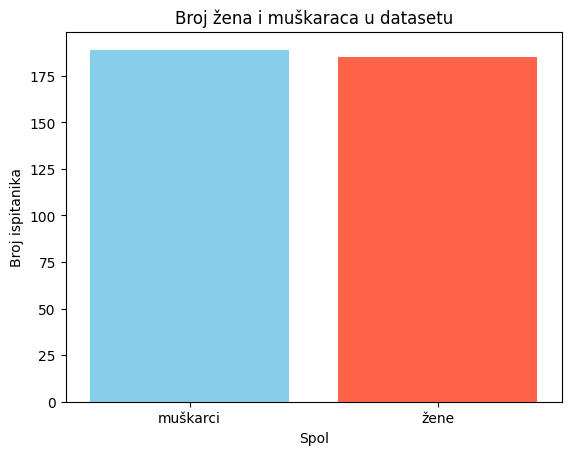

In [ ]:
# Izračunavanje broja žena i muškaraca
gender_counts = dataset['Gender'].value_counts()

# Kreiranje bar plot-a
plt.bar(['muškarci', 'žene'], gender_counts.values, color=['skyblue', 'tomato'])
plt.xlabel('Spol')
plt.ylabel('Broj ispitanika')
plt.title('Broj žena i muškaraca u datasetu')
plt.xlim([-0.5, 1.5])
plt.show()

Sljedeće što želimo ispitati jeste raspodjela instanci po starosnim dobima. Pošto je jedna od kolona u datasetu i zanimanje, pretpostavljamo da je vršeno ispitivanje kvalitete sna na odraslim osobama, ali ćemo ispitati sve starosne grupe.

Sa bar plota možemo očitati da su svi ispitanici pripadaju starosnim dobima 20-29, 30-39 i 40-59, kao što je i pretpostavljeno. Također se vidi da je najviše ispitanika iz starosne grupe 30-39, što bi bila prosječna srednja dob čovjeka.

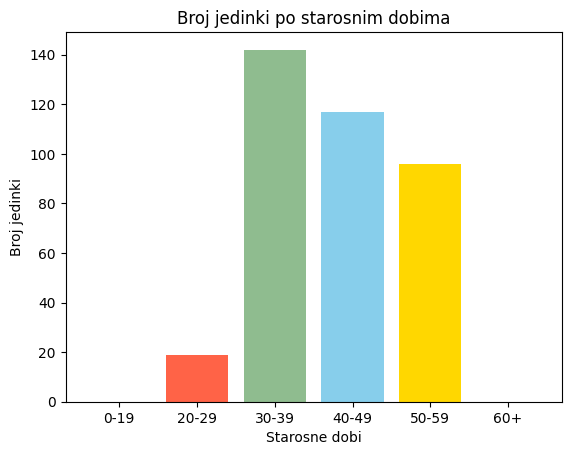

In [ ]:
# Podjela na starosne dobi
bins = [0, 19, 29, 39, 49, 59, dataset['Age'].max() + 1]
labels = ['0-19', '20-29', '30-39','40-49','50-59', '60+']
dataset['age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, include_lowest=True)

# Izračunavanje broja jedinki po starosnim dobima
age_counts = dataset['age_group'].value_counts().sort_index()

# Kreiranje bar plot-a
plt.bar(age_counts.index, age_counts.values, color=['gold', 'tomato', 'darkseagreen', 'skyblue'])
plt.xlabel('Starosne dobi')
plt.ylabel('Broj jedinki')
plt.title('Broj jedinki po starosnim dobima')
plt.show()


Dalje smo ispitivali raspodjelu po kategoričkim varijablama u datasetu. Sa sljedećeg grafa vidimo da raspodjela prema kategorijama BMI također nije ravnomjerna. Najveći dio dataseta čine ispitanici s 'normalnom' vrijednošću BMI, dok 'pretilih' ispitanika ima jako malo, što može značajno utjecati na raspodjele ostalih atributa.

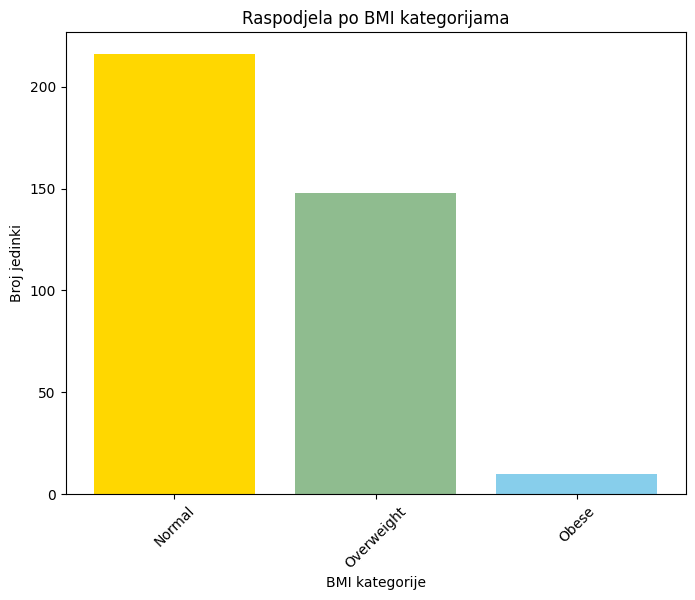

In [ ]:
data1['BMI Category'] = data1['BMI Category'].str.strip().replace({'Normal Weight': 'Normal'})
category_counts = data1['BMI Category'].value_counts()
category_counts = category_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))

colors = ['gold', 'darkseagreen', 'skyblue']
plt.bar(category_counts.index, category_counts.values, color=colors)

plt.xlabel('BMI kategorije')
plt.ylabel('Broj jedinki')
plt.title('Raspodjela po BMI kategorijama')

plt.xticks(rotation=45)

plt.show()

Još jedan vrlo značajan atribut koji vrijedi istražiti je zanimanje ispitanika čija je raspodjela prikazana na sljedećem plotu. Iz ovog grafika, kao i iz prethodnih analiza, primjećujemo da postoji neravnomjerna raspodjela i određena pristranost prema određenim zanimanjima, posebno u medicinskom sektoru.

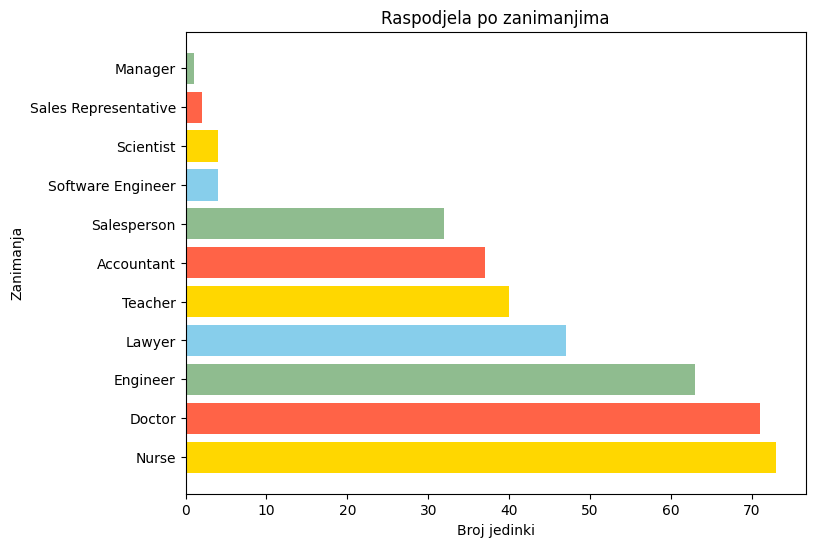

In [ ]:
category_counts = dataset['Occupation'].value_counts()
category_counts = category_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))

colors = ['gold', 'tomato', 'darkseagreen', 'skyblue']

plt.barh(category_counts.index, category_counts.values, color=colors)

plt.xlabel('Broj jedinki')
plt.ylabel('Zanimanja')
plt.title('Raspodjela po zanimanjima')

plt.show()

Dalje, posmatramo još jedan izuzetno bitan atribut koji ima veliki potencijal za daljnje analize, a to je prisustvo poremećaja spavanja kod ispitanika. Analizom podataka, otkrivamo da iako mnogi ispitanici nemaju takve probleme, više od polovine njih izvještava o prisustvu poremećaja poput insomnije ili apnee u snu.
Ova saznanja su izuzetno vrijedna jer poremećaji spavanja mogu značajno utjecati na kvalitet života ispitanika. Visok postotak ispitanika koji se suočavaju s ovim problemima nas upućuje na važnost dodatnih analiza i istraživanja u ovom području.


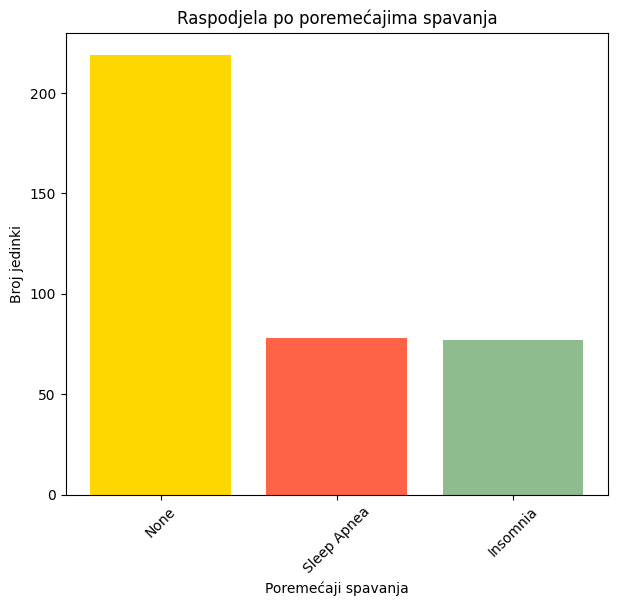

In [ ]:
category_counts = dataset['Sleep Disorder'].value_counts()
category_counts = category_counts.sort_values(ascending=False)
plt.figure(figsize=(7, 6))

colors = ['gold', 'tomato', 'darkseagreen']
plt.bar(category_counts.index, category_counts.values, color=colors)

plt.xlabel('Poremećaji spavanja')
plt.ylabel('Broj jedinki')
plt.title('Raspodjela po poremećajima spavanja')

plt.xticks(rotation=45)

plt.show()

Bitno je ispitati kakav uticaj imaju poremećaji sna s njegovim trajanjem. Na x osi su kategorije poremećaja a na y osi trajanje sna. Svaki box predstavlja raspodjelu sna za tačno taj tip poremećaja.
Na ovaj način možemo da vidimo eventualno odstupanje ili ekstremne vrijednosti u trajanju sna za svaku kategoriju.
Vidimo da je najšira raspodjela za apneju. Ova šira raspodjela može ukazivati na različite razine ozbiljnosti poremećaja i individualne varijacije u trajanju sna među osobama s apnejom.

Na temelju prikazanog box plot-a, primjećujemo da je medijan kvalitete sna najniži za kategoriju Insomnia. To sugerira da osobe s dijagnozom insomnia imaju općenito nižu kvalitetu sna u usporedbi s drugim tipovima poremećaja spavanja ili osobama koje nemaju poremećaj spavanja.
Niži medijan kvalitete sna kod osoba s insomnijom može ukazivati na češće probleme sa spavanjem, poteškoće u postizanju dubokog i kvalitetnog sna te moguće nuspojave kao što su umor ili nedostatak energije tokom dana.
Ovi rezultati naglašavaju potrebu za dodatnim praćenjem i liječenjem insomnije i apneje kako bi se poboljšala kvaliteta sna i opće dobrobit osoba koje pate od ovih poremećaja.

In [ ]:
df_sleep = dataset[['Sleep Duration', 'Quality of Sleep', 'Sleep Disorder']]
df_sleep = df_sleep.dropna()

fig = px.box(df_sleep, x='Sleep Disorder', y='Sleep Duration', color='Sleep Disorder', title='Impact of Sleep Disorders on Sleep Duration', labels={'Sleep Disorder': 'Sleep Disorder', 'Sleep Duration': 'Sleep Duration'})
fig.update_layout(xaxis=dict(title='Sleep Disorder'), yaxis=dict(title='Sleep Duration'))

fig.show()


Također je bitno vidjeti kakva je zavisnost između starosne dobi i kvalitete sna.
Kvalitet sna igra ključnu ulogu u zdravlju i dobrobiti pojedinca, te je bitno
razumijeti kako godine mogu uticati na kvalitetu sna.
Stupci u bar plotu omogućavaju da uporedimo međusobno kvalitete, a crvena linija
predstavlja prosječni kvalitet sna uključujući sve grupe. Stupci iznad crvene linije imaju nadprosječni kvalitet, a ove ispod ispodprosječni.

Kroz analizu plota možemo da uočimo sljedeće: za razliku od moje lične pretpostavke da možda starije osobe imaju lošiju
kvalitetu sna uzimajući u obzir porast zdravstvenih problema s godinama, iznenađujuće,
osobe starije starosne dobi imaju iznadprosječni kvalitet sna
(međutim bitno je napomenuti da ovo nije baš vjerodostojno s obzirom da nam je
najstarija starosna dob 59 a najmlađa 27, trebali bi da imamo još širi spektar
za bolje zaključke). Bitno je također naglasiti da nije starosna dob glavni faktor koji utiče na kvalitet sna.


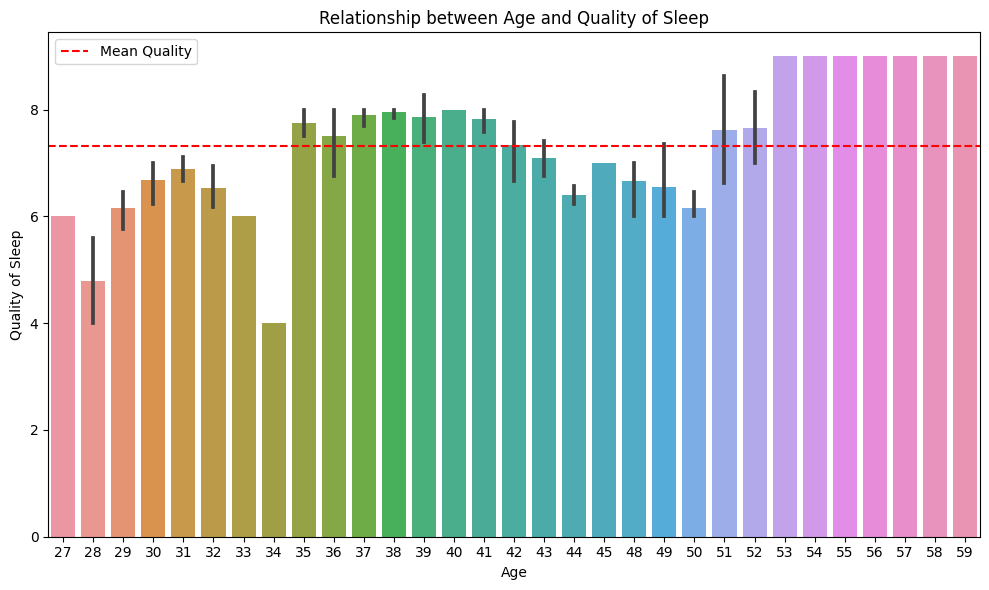

In [ ]:
df = dataset[['Age', 'Quality of Sleep']]

df = df.dropna()

plt.figure(figsize=(10, 6))

sns.barplot(x='Age', y='Quality of Sleep', data=df)

plt.xlabel('Age')
plt.ylabel('Quality of Sleep')
plt.title('Relationship between Age and Quality of Sleep')

mean_quality = df['Quality of Sleep'].mean()
plt.axhline(mean_quality, color='red', linestyle='--', label='Mean Quality')

plt.legend()
plt.tight_layout()
plt.show()

# **CHI-SQUARE TEST ZA ISPITIVANJE NEZAVISNOSTI KATEGORIJSKIH VARIJABLI**

U ovom istraživanju želimo provjeriti postoji li zavisnost između varijable poremećaja sna i varijable zanimanje. Poremećaji spavanja, kao što su nesanica i apneja tokom spavanja, mogu značajno utjecati na kvalitetu sna i opću dobrobit pojedinca. S druge strane, zanimanje osobe može imati utjecaj na različite aspekte života, uključujući stil života, radni ritam i stres.

Iz tog razloga ćemo koristit chi-kvadratni test nezavisnosti. To je statistička metoda koja se koristi za ispitivanje povezanosti između dvije kategorijske varijable. Ovaj test pomaže u utvrđivanju postoji li značajna veza između varijabli ili su one nezavisne. U našem slučaju, želimo istražiti jesu li pojedinci s određenim zanimanjem skloniji ili manje skloni razvoju poremećaja spavanja.

Pristupit ćemo analizi tako da prvo konstruiramo kontigencijsku tablicu koja prikazuje broj promatranja u svakoj kombinaciji vrijednosti za varijable poremećaj sna i zanimanje. Zatim ćemo primijeniti chi-kvadratni test na tu tablicu kako bismo dobili rezultate i interpretirali značajnost rezultata.

Cilj ovog istraživanja je razumjeti potencijalnu povezanost između zanimanja i poremećaja spavanja te identificirati eventualne veze koje bi mogle biti korisne za daljnje istraživanje i intervencije usmjerene na poboljšanje kvalitete sna i zdravlja spavanja u različitim zanimanjima.

In [ ]:
var1 = dataset["Sleep Disorder"]
var2 = dataset["Occupation"]

contingency_table = pd.crosstab(var1, var2,margins=True)
print(contingency_table)


Occupation      Accountant  Doctor  Engineer  Lawyer  Manager  Nurse  \
Sleep Disorder                                                         
Insomnia                 7       3         5       2        0      3   
None                    30      64        57      42        1      9   
Sleep Apnea              0       4         1       3        0     61   
All                     37      71        63      47        1     73   

Occupation      Sales Representative  Salesperson  Scientist  \
Sleep Disorder                                                 
Insomnia                           0           29          0   
None                               0            2          2   
Sleep Apnea                        2            1          2   
All                                2           32          4   

Occupation      Software Engineer  Teacher  All  
Sleep Disorder                                   
Insomnia                        1       27   77  
None                            

Sljedeći korak jeste izračunavanje očekivane frekvencijske tablice za chi-kvadratni test nezavisnosti. Razlika između prethodne tablice i ove (General Observed Contingency Table i General Expected Contingency Table):

General Observed Contingency Table je tablica koja sadrži stvarne frekvencije za kombinacije vrijednosti dvije kategorijske varijable.

General Expected Contingency Table je tablica koja sadrži očekivane frekvencije za kombinacije vrijednosti dvije kategorijskih varijabli. Očekivane frekvencije se izračunavaju na osnovu pretpostavke da su dvije varijable nezavisne, a koriste se marginalne frekvencije kako bi se izračunala očekivana frekvencija za svaku kombinaciju vrijednosti.

Ovo omogućuje usporedbu stvarnih i očekivanih frekvencija kako bi se odredila značajnost veze između varijabli.

In [ ]:
var1 = dataset["Sleep Disorder"]
var2 = dataset["Occupation"]

observed_table = pd.crosstab(var1, var2)

row_totals = observed_table.sum(axis=1)
col_totals = observed_table.sum(axis=0)
total = observed_table.sum().sum()

expected_table = np.outer(row_totals, col_totals) / total

expected_table = pd.DataFrame(expected_table, index=observed_table.index, columns=observed_table.columns)

print(expected_table)

Occupation      Accountant     Doctor   Engineer     Lawyer   Manager  \
Sleep Disorder                                                          
Insomnia          7.617647  14.617647  12.970588   9.676471  0.205882   
None             21.665775  41.574866  36.890374  27.521390  0.585561   
Sleep Apnea       7.716578  14.807487  13.139037   9.802139  0.208556   

Occupation          Nurse  Sales Representative  Salesperson  Scientist  \
Sleep Disorder                                                            
Insomnia        15.029412              0.411765     6.588235   0.823529   
None            42.745989              1.171123    18.737968   2.342246   
Sleep Apnea     15.224599              0.417112     6.673797   0.834225   

Occupation      Software Engineer    Teacher  
Sleep Disorder                                
Insomnia                 0.823529   8.235294  
None                     2.342246  23.422460  
Sleep Apnea              0.834225   8.342246  


In [ ]:
chi2 = np.sum((observed_table - expected_table)**2 / expected_table)

# Izračunavanje stepeni slobode
df = (observed_table.shape[0] - 1) * (observed_table.shape[1] - 1)

# Izračunavanje p-vrijednosti
p_value = 1 - stats.chi2.cdf(chi2, df)

# Ispis rezultata
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", df)
print("p-value:", p_value)

Chi-square statistic: Occupation
Accountant               10.972603
Doctor                   29.217291
Engineer                 27.075301
Lawyer                   18.427140
Manager                   0.707763
Nurse                   173.900836
Sales Representative      7.589744
Salesperson              96.015096
Scientist                 2.502634
Software Engineer         1.056751
Teacher                  53.897596
dtype: float64
Degrees of freedom: 20
p-value: [9.46929927e-01 8.35681761e-02 1.33158708e-01 5.59292681e-01
 1.00000000e+00 0.00000000e+00 9.94252772e-01 6.46183107e-12
 9.99999164e-01 1.00000000e+00 5.99048543e-05]


Veće vrijednosti chi-kvadratne statistike ukazuju na veću zavisnost između zanimanja i varijable koja se proučava.

P-vrijednost: P-vrijednost predstavlja vjerojatnost da se dobije chi-kvadratna statistika jednaka ili veća od one koju smo posmatrali, prema pretpostavci da je nulta hipoteza istinita. Manje p-vrijednosti ukazuju na statistički značajne rezultate.

Na temelju p-vrijednosti, možemo zaključiti sljedeće:

Za zanimanja s visokim p-vrijednostima (bliskim 1), poput Accountant, Engineer, Lawyer, i Sales Representative, ne možemo odbaciti nultu hipotezu. To znači da nema dovoljno dokaza da postoji statistički značajna veza između tih zanimanja i varijable Sleep Disorder.

Za zanimanja s niskim p-vrijednostima (bliskim 0), poput Doctor, Nurse, Salesperson, Teacher, i Software Engineer, možemo odbaciti nultu hipotezu. To ukazuje na statistički značajnu vezu između tih zanimanja i varijable Sleep Disorder.

Na kraju koristeći test statistike, stepen slobode, alpha te kritične vrijednosti dolazimo do sljedećeg zaključka.

In [ ]:
alpha = 0.05
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
critical_value = stats.chi2.ppf(1 - alpha, df)

if chi2 > critical_value:
    print("Odbacujemo nultu hipotezu. Postoji statistički značajna veza između varijabli.")
else:
    print("Prihvaćamo nultu hipotezu. Nema statistički značajne veze između varijabli.")

Odbacujemo nultu hipotezu. Postoji statistički značajna veza između varijabli.


Sljedeće ispitujemo zavisnost indeksa tjelesne mase i spola.
Razlog zašto smo odabrali istražiti povezanost između kategorija indeksa tjelesne mase i spola ispitanika je naš interes za razumijevanje kako se BMI kategorije raspodjeljuju među različitim spolovima. Željeli sam saznati ima li razlika u raspodjeli BMI kategorija između muškaraca i žena te kako spol može utjecati na zdravstveno stanje i prehrambene navike.

BMI mi je poznat kao važna mjera koja se koristi u procjeni tjelesne kompozicije i rizika za različite zdravstvene probleme. Zanimljivo je istražiti kako se ta mjera razlikuje između muškaraca i žena te kako bi spol mogao biti faktor koji utiče na različite kategorije BMI.

Postupak je isti kao u prethodnom ispitivanju te zbog toga nećemo toliko detaljno objašnjavati.

In [ ]:
var1 = dataset["BMI Category"]
var2 = dataset["Gender"]

contingency_table = pd.crosstab(var1, var2,margins=True)
print(contingency_table)

Gender         Female  Male  All
BMI Category                    
Normal             64   131  195
Normal Weight      14     7   21
Obese               1     9   10
Overweight        106    42  148
All               185   189  374


Sljedeći korak jeste izračunavanje očekivane frekvencijske tablice za chi-kvadrat test nezavisnosti. Razlika izmedju prethodne tablice i ove (General Observed Contingency Table i General Expected Contingency Table):

In [ ]:
var1 = dataset["BMI Category"]
var2 = dataset["Gender"]

observed_table = pd.crosstab(var1, var2)

row_totals = observed_table.sum(axis=1)
col_totals = observed_table.sum(axis=0)
total = observed_table.sum().sum()

expected_table = np.outer(row_totals, col_totals) / total

expected_table = pd.DataFrame(expected_table, index=observed_table.index, columns=observed_table.columns)

print(expected_table)

Gender            Female       Male
BMI Category                       
Normal         96.457219  98.542781
Normal Weight  10.387701  10.612299
Obese           4.946524   5.053476
Overweight     73.208556  74.791444


In [ ]:
chi2 = np.sum((observed_table - expected_table)**2 / expected_table)

# Izračunavanje stepeni slobode
df = (observed_table.shape[0] - 1) * (observed_table.shape[1] - 1)

# Izračunavanje p-vrijednosti
p_value = 1 - stats.chi2.cdf(chi2, df)

# Ispis rezultata
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", df)
print("p-value:", p_value)

Chi-square statistic: Gender
Female    30.014380
Male      29.379155
dtype: float64
Degrees of freedom: 3
p-value: [1.37047842e-06 1.86401595e-06]


Odavdje zaključujemo:

Za spol "Female": Chi-kvadrat statistika iznosi 30.014380, što ukazuje na statistički značajnu vezu između spola "Female" i promatrane varijable. P-vrijednost od 1.37047842e-06 je izuzetno mala, što znači da je vrlo mala vjerovatnoća da se takvi rezultati dobiju slučajno ako nema stvarne veze između spola "Female" i promatrane varijable.

Za spol "Male": Chi-kvadrat statistika iznosi 29.379155, također ukazujući na statistički značajnu vezu između spola "Male" i promatrane varijable. P-vrijednost od 1.86401595e-06 je također vrlo mala, što implicira da je vrlo malo vjerojatno da se takvi rezultati dobiju slučajno ako nema stvarne veze između spola "Male" i promatrane varijable.

U oba slučaja, statistički test sugerira da postoji značajna veza između spola ispitanika i promatrane varijable.

Ali ćemo ipak još ispitati preko test statistike:

In [ ]:
alpha = 0.05
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
critical_value = stats.chi2.ppf(1 - alpha, df)

if chi2 > critical_value:
    print("Odbacujemo nultu hipotezu. Postoji statistički značajna veza između varijabli.")
else:
    print("Prihvaćamo nultu hipotezu. Nema statistički značajne veze između varijabli.")

Odbacujemo nultu hipotezu. Postoji statistički značajna veza između varijabli.


Na kraju smo odabrali da testiramo povezanost između BMI kategorija i prisutnosti poremećaja spavanja.

Indeks tjelesne mase (BMI) je mjera koja se koristi za procjenu tjelesne mase u odnosu na visinu. Ova kategorizacija omogućuje podjelu ispitanika u različite kategorije poput "Normalne", "Gojazne" itd. BMI se često koristi kao indikator općeg zdravlja i tjelesne kompozicije.

S druge strane, poremećaji spavanja su medicinski problemi koji utiču na kvalitetu i raspored spavanja. Mogu se manifestirati kao poteškoće s uspavljivanjem, održavanjem sna ili kao abnormalni obrasci spavanja. Oni mogu biti povezani s različitim zdravstvenim stanjima kao što su srčane bolesti, dijabetes, depresija..

S obzirom na prirodu ove dvije varijable, postoji osnovna pretpostavka da postoji povezanost između BMI kategorija i poremećaja spavanja. Na primjer, gojaznost i poremećaji spavanja mogu biti povezani jer gojaznost može dovesti do problema s disanjem tokom spavanja kao što je opstruktivna apneja.

In [ ]:
var1 = dataset["BMI Category"]
var2 = dataset["Sleep Disorder"]

contingency_table = pd.crosstab(var1, var2,margins=True)
print(contingency_table)

Sleep Disorder  Insomnia  None  Sleep Apnea  All
BMI Category                                    
Normal                 7   183            5  195
Normal Weight          2    17            2   21
Obese                  4     0            6   10
Overweight            64    19           65  148
All                   77   219           78  374


In [ ]:
var1 = dataset["BMI Category"]
var2 = dataset["Sleep Disorder"]

observed_table = pd.crosstab(var1, var2)

row_totals = observed_table.sum(axis=1)
col_totals = observed_table.sum(axis=0)
total = observed_table.sum().sum()

expected_table = np.outer(row_totals, col_totals) / total

expected_table = pd.DataFrame(expected_table, index=observed_table.index, columns=observed_table.columns)

print(expected_table)

Sleep Disorder   Insomnia        None  Sleep Apnea
BMI Category                                      
Normal          40.147059  114.184492    40.668449
Normal Weight    4.323529   12.296791     4.379679
Obese            2.058824    5.855615     2.085561
Overweight      30.470588   86.663102    30.866310


In [ ]:
chi2 = np.sum((observed_table - expected_table)**2 / expected_table)

# Izračunavanje stepeni slobode
df = (observed_table.shape[0] - 1) * (observed_table.shape[1] - 1)

# Izračunavanje p-vrijednosti
p_value = 1 - stats.chi2.cdf(chi2, df)

# Ispis rezultata
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", df)
print("p-value:", p_value)

Chi-square statistic: Sleep Disorder
Insomnia        67.341822
None           101.956136
Sleep Apnea     77.670205
dtype: float64
Degrees of freedom: 6
p-value: [1.43274281e-12 0.00000000e+00 1.07691633e-14]


Više vrijednosti Chi-kvadrata ukazuju na veće odstupanje od očekivanog, što može sugerirati postojanje veze između varijabli.

p-vrijednosti: Dobili smo sljedeće p-vrijednosti:

Insomnia: 1.43274281e-12 (vrlo mala vrijednost)
None: 0.00000000e+00 (vrlo mala vrijednost)
Sleep Apnea: 1.07691633e-14 (vrlo mala vrijednost)

P-vrijednost predstavlja vjerovatnoću da se dobije odstupanje jednakog ili većeg od onog koje smo promatrali, ako je nulta hipoteza (nema veze između varijabli) istinita. Vrlo male p-vrijednosti ukazuju na to da postoji statistički značajna veza između BMI kategorija i prisutnosti poremećaja spavanja.

To sugerira da je vjerovatnoća da je veza između ovih dviju varijabli stvarna, a ne rezultat slučajnosti.

Međutim ovo ćemo ispitat uz test statistiku:


In [ ]:
alpha = 0.05
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
critical_value = stats.chi2.ppf(1 - alpha, df)

if chi2 > critical_value:
    print("Odbacujemo nultu hipotezu. Postoji statistički značajna veza između varijabli.")
else:
    print("Prihvaćamo nultu hipotezu. Nema statistički značajne veze između varijabli.")

Odbacujemo nultu hipotezu. Postoji statistički značajna veza između varijabli.


# **PROVJERA NORMALNE DISTRIBUCIJE PODATAKA**

Slejedeći zadatak je bio da se za svaku numeričku varijablu provjeri da li prati normalnu distribuciju koristeći nekoliko metoda: Kolmogorov–Smirnov i Shapiro–Wilk statističke testove, i QQ-plot kao grafički test. Testiranje ove osobine je izuzetno važno za dalju analizu dataseta jer nam pokazuje da li se može primijeniti aproksimacija nasumične varijable normalne distribucije u računanju intervala pouzdanosti i kritičnih regiona u sklopu postavljanja i ispitivanja hipoteza. U datasetu imamo 9 numeričkih varijabli ako se uzmu u obzir razdvojeni sistolički i dijastolički pritisak.

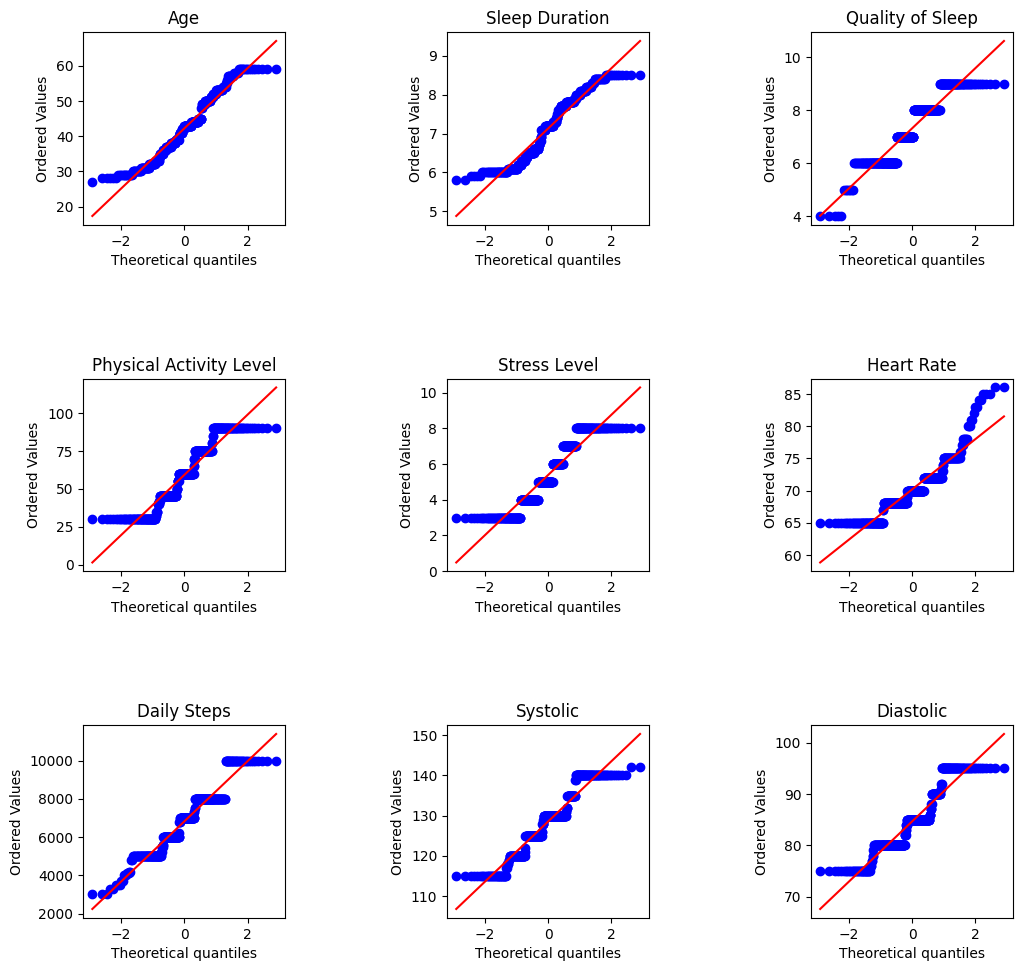

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

Blood_Pressure = dataset['Blood Pressure'].values.astype(str)
Systolic, Diastolic = [], []
for idx,val in enumerate(Blood_Pressure):
    Systolic.append(int(str(val).split('/')[0]))
    Diastolic.append(int(str(val).split('/')[1]))

dataset = dataset.drop('Blood Pressure',axis=1)
dataset.insert(7,'Systolic',Systolic)
dataset.insert(8,'Diastolic',Diastolic)
dataset

numeric = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]
fig, axs = plt.subplots(3, 3, figsize=(12, 11.5))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

# Iterate over pairs of parameters

for i, ax in enumerate(axs.flat):
    probplot(dataset[numeric[i]], plot=axs[int(i/3), i%3])
    ax.set_title(numeric[i])

plt.show()

In [ ]:
import scipy.stats as stats

numeric = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]

for var in numeric:
    data = dataset[var]
    print(f"Varijabla: {var}")

    # Perform Kolmogorov-Smirnov test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    print(f"Kolmogorov-Smirnov test - KS statistika: {ks_stat}, p-vrijednost: {ks_p_value}")

    # Perform Shapiro-Wilk test
    shapiro_stat, shapiro_p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk test - W statistika: {shapiro_stat}, p-vrijednost: {shapiro_p_value}")

    print()  # Add a new line between variables


Varijabla: Age
Kolmogorov-Smirnov test - KS statistika: 1.0, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.9580035209655762, p-vrijednost: 7.4213430956149296e-09

Varijabla: Sleep Duration
Kolmogorov-Smirnov test - KS statistika: 0.999999996684254, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.9357648491859436, p-vrijednost: 1.2668722841613356e-11

Varijabla: Quality of Sleep
Kolmogorov-Smirnov test - KS statistika: 0.9999683287581669, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.8938649892807007, p-vrijednost: 1.882131560996289e-15

Varijabla: Physical Activity Level
Kolmogorov-Smirnov test - KS statistika: 1.0, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.8994297385215759, p-vrijednost: 5.178644243031966e-15

Varijabla: Stress Level
Kolmogorov-Smirnov test - KS statistika: 0.9986501019683699, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.8908881545066833, p-vrijednost: 1.1121582831513958e-15

Varijabla: Heart Rate
Kolmogorov-Smirnov test - KS

ZAKLJUČAK:
Iako se čini da QQ-plot ukazuje na normalnu distribuciju, može doći do problema zbog preklapanja tačaka podataka i pristranosti gustine prema određenim vrijednostima. Također je malo teže analizirati plot kada su u pitanju diskretne vrijednosti. Granične vrijednosti u donje lijevog uglu i gornjem desnogm uglu grafova su pretežno oni koji odstupaju.

Koristeći Shapiro-Wilkov test, čini se da nijedan od parametara ne prati normalnu distribuciju.  Ovdje može biti problem s gustinom određenih tačaka podataka. Uprkos ovim problemima, čini se da neke distribucije, kao što je Age(starost), aproksimiraju normalnu distribuciju.
Što se tiče Kolmogorov-Smirnov testa, i on nam daje približno iste podatke kao i Shapiro test. Za dalji proračun uzet ćemo u obzir da su numeričke varijable u datasetu aproksimalno normalno distribuirane.

# **ESTIMACIJA INTERVALA POUZDANOSTI SREDNJE VRIJEDNOSTI**

Interval pouzdanosti je opseg vrijednosti koji daje procjenu stvarnog parametra populacije, kao što je srednja vrijednost, na osnovu uzorka iz te populacije.

Prilikom izračunavanja intervala pouzdanosti za srednju vrijednost skupa podataka, obično se koriste srednja vrijednost uzorka i standardna greška estimacije (kraći naziv za količnik standardne devijacije i korijena veličine uzorka) kao ključne komponente.

Kritična vrijednost zavisi od željenog nivoa pouzdanosti, koji se često izražava u procentima. Uobičajeni izbori su 90%, 95% ili 99% intervali pouzdanosti. Kritična vrijednost se određuje na osnovu distribucije podataka i odabranog nivoa pouzdanosti. Na primjer, ako pretpostavimo normalnu distribuciju i želimo interval pouzdanosti od 95%, kritična vrijednost bi se obično dobila iz tabele ili bi se izračunala pomoću nekog softvera.

Izračunavanjem intervala pouzdanosti, možemo dati opseg unutar kojeg smo sigurni da se prava populacija nalazi. Na primjer, interval pouzdanosti od 95% znači da ako biste ponovili proces uzorkovanja mnogo puta, otprilike 95% izračunatih intervala bi sadržavalo pravu srednju vrijednost populacije.

Važno je napomenuti da interval pouzdanosti pruža procjenu opsega vjerodostojnih vrijednosti za srednju vrijednost populacije, ali **ne garantuje** da prava srednja vrijednost populacije spada u taj raspon.


Sada pređimo na određivanje intervala pouzdanosti za numeričke varijable našeg seta podataka.

Međutim, prije nego pređemo na izradu zadatka, neophodno je izvršiti par provjera i korekcija u setu podataka.



In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split


dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Systolic,Diastolic,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,age_group
0,1,Male,27,Software Engineer,6.1,6,42,126,83,6,Overweight,77,4200,None,20-29
1,2,Male,28,Doctor,6.2,6,60,125,80,8,Normal,75,10000,None,20-29
2,3,Male,28,Doctor,6.2,6,60,125,80,8,Normal,75,10000,None,20-29
3,4,Male,28,Sales Representative,5.9,4,30,140,90,8,Obese,85,3000,Sleep Apnea,20-29
4,5,Male,28,Sales Representative,5.9,4,30,140,90,8,Obese,85,3000,Sleep Apnea,20-29


Korekcija Sleep Duration kolone, jer nema smisla da je neko spavao 7 sati i 80 minuta. Svaki iznos preko 60 minuta se treba korigovati.

Prikaz svih jedinstvenih vrijednosti Sleep Duration, tako da možemo vidjeti da su neophodne korekcije.

In [ ]:
np.unique(dataset['Sleep Duration'])

array([5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.1,
       7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4,
       8.5])

Sada kada smo korigovali da sve vrijednosti budu u "normalnom" opsegu sati, najbolje bi bilo razdvojiti vrijednosti sati i minuta na dvije različite kolone.

In [ ]:
Updated_Sleep_Duration = []
for idx,val in enumerate(dataset['Sleep Duration']):
    Updated_Duration_Temp = val
    Hours,Minutes = int(str(val).split('.')[0]),int(str(val).split('.')[1])
    if Minutes > 6:
        Minutes = Minutes - 6
        Hours = Hours + 1
        Updated_Duration_Temp = Hours + Minutes
    Updated_Sleep_Duration.append(Updated_Duration_Temp)

dataset['Sleep Duration'] = Updated_Sleep_Duration
dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Systolic,Diastolic,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,age_group
0,1,Male,27,Software Engineer,6.1,6,42,126,83,6,Overweight,77,4200,None,20-29
1,2,Male,28,Doctor,6.2,6,60,125,80,8,Normal,75,10000,None,20-29
2,3,Male,28,Doctor,6.2,6,60,125,80,8,Normal,75,10000,None,20-29
3,4,Male,28,Sales Representative,9.0,4,30,140,90,8,Obese,85,3000,Sleep Apnea,20-29
4,5,Male,28,Sales Representative,9.0,4,30,140,90,8,Obese,85,3000,Sleep Apnea,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,140,95,3,Overweight,68,7000,Sleep Apnea,50-59
370,371,Female,59,Nurse,8.0,9,75,140,95,3,Overweight,68,7000,Sleep Apnea,50-59
371,372,Female,59,Nurse,8.1,9,75,140,95,3,Overweight,68,7000,Sleep Apnea,50-59
372,373,Female,59,Nurse,8.1,9,75,140,95,3,Overweight,68,7000,Sleep Apnea,50-59


In [ ]:
Sleep_Duration = dataset['Sleep Duration'].values.astype(str)
Sleep_Hours, Sleep_Minutes = [], []
for idx,val in enumerate(Sleep_Duration):
    Hours,Minutes = int(str(val).split('.')[0]),int(str(val).split('.')[1])
    Sleep_Hours.append(Hours)
    Sleep_Minutes.append(Minutes*10)

dataset = dataset.drop('Sleep Duration',axis=1)
dataset.insert(3,'Sleep Hours',Sleep_Hours)
dataset.insert(4,'Sleep Minutes',Sleep_Minutes)
dataset

,Person ID,Gender,Age,Sleep Hours,Sleep Minutes,Occupation,Quality of Sleep,Physical Activity Level,Systolic,Diastolic,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,age_group
0,1,Male,27,6,10,Software Engineer,6,42,126,83,6,Overweight,77,4200,None,20-29
1,2,Male,28,6,20,Doctor,6,60,125,80,8,Normal,75,10000,None,20-29
2,3,Male,28,6,20,Doctor,6,60,125,80,8,Normal,75,10000,None,20-29
3,4,Male,28,9,0,Sales Representative,4,30,140,90,8,Obese,85,3000,Sleep Apnea,20-29
4,5,Male,28,9,0,Sales Representative,4,30,140,90,8,Obese,85,3000,Sleep Apnea,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,8,10,Nurse,9,75,140,95,3,Overweight,68,7000,Sleep Apnea,50-59
370,371,Female,59,8,0,Nurse,9,75,140,95,3,Overweight,68,7000,Sleep Apnea,50-59
371,372,Female,59,8,10,Nurse,9,75,140,95,3,Overweight,68,7000,Sleep Apnea,50-59
372,373,Female,59,8,10,Nurse,9,75,140,95,3,Overweight,68,7000,Sleep Apnea,50-59


Sada prelazimo na proračun intervala pouzdanosti za numeričke varijable našeg seta podataka (naravno bez Person ID, jer to nema ni smisla raditi).

Prvo ćemo odrediti naravno standardnu devijaciju, srednju vrijednost, veličinu uzorka (ili populacije, vidjet ćemo kasnije) i vrijednost t statistike za 95% pouzdanosti. Ovdje ćemo prihvatiti činjenicu da je ovo samo uzorak pa smo zvog toga koristili t statistiku.

In [ ]:
All_Numerical_Columns = dataset.select_dtypes(exclude=['object']).columns
All_Numerical_Columns

Index(['Person ID', 'Age', 'Sleep Hours', 'Sleep Minutes', 'Quality of Sleep',
       'Physical Activity Level', 'Systolic', 'Diastolic', 'Stress Level',
       'Heart Rate', 'Daily Steps', 'age_group'],
      dtype='object')

In [ ]:
columns = [ 'Age', 'Sleep Hours', 'Sleep Minutes', 'Quality of Sleep', 'Systolic', 'Diastolic',
           'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

sample_data = dataset[columns]

sample_mean = sample_data.mean()

sample_std = sample_data.std()

sample_size = len(sample_data)

standard_error = sample_std / np.sqrt(sample_size)

t_score = stats.t.ppf(0.975, df=sample_size - 1)

margin_of_error = t_score * standard_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

confidence_intervals = pd.DataFrame({
                                     'Lower Bound': lower_bound.round(5),
                                     'Upper Bound': upper_bound.round(5)})

print(confidence_intervals)

                         Lower Bound  Upper Bound
Age                         41.30263     43.06635
Sleep Hours                  7.20638      7.48346
Sleep Minutes               18.90771     23.07090
Quality of Sleep             7.19113      7.43454
Systolic                   127.76567    129.34128
Diastolic                   84.02324     85.27623
Physical Activity Level     57.05310     61.28914
Stress Level                 5.20460      5.56546
Heart Rate                  69.74527     70.58628
Daily Steps               6652.33971   6981.35013


Kao sto smo najavili sada ćemo pretpostaviti da je ovo populacija, pošto je veličina ovog uzorka dovoljne veličine i obaviti identičan proračun kao i u prethodnom slučaju, samo što sada koristimo z statistiku iz razloga što sada radimo nad čitavnom populacijom.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

columns = [ 'Age', 'Sleep Hours', 'Sleep Minutes', 'Quality of Sleep', 'Systolic', 'Diastolic',
           'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

population_data = dataset[columns]

population_mean = population_data.mean()

population_std = population_data.std()

population_size = len(population_data)

standard_error = population_std / np.sqrt(population_size)

z_score = stats.norm.ppf(0.975)

margin_of_error = z_score * standard_error

lower_bound = population_mean - margin_of_error
upper_bound = population_mean + margin_of_error

confidence_intervals_z = pd.DataFrame({
                                     'Lower Bound': lower_bound.round(5),
                                     'Upper Bound': upper_bound.round(5)})

print(confidence_intervals_z)


                         Lower Bound  Upper Bound
Age                         41.30549     43.06349
Sleep Hours                  7.20683      7.48301
Sleep Minutes               18.91447     23.06414
Quality of Sleep             7.19153      7.43414
Systolic                   127.76822    129.33873
Diastolic                   84.02527     85.27420
Physical Activity Level     57.05998     61.28227
Stress Level                 5.20518      5.56487
Heart Rate                  69.74664     70.58492
Daily Steps               6652.87349   6980.81635


Da bismo se uvjerili da veličina greške pri estimaciji uzorka sa populacijom u drugom slučaju, izračunat ćemo apsolutnu razliku izmedju gornje i donje granice kod t i z statistike.

In [ ]:
confidence_intervals['Absolute Difference (Lower Bound)'] = np.abs(confidence_intervals['Lower Bound'] - confidence_intervals_z['Lower Bound'])
confidence_intervals['Absolute Difference (Upper Bound)'] = np.abs(confidence_intervals['Upper Bound'] - confidence_intervals_z['Upper Bound'])

print(confidence_intervals[['Absolute Difference (Lower Bound)', 'Absolute Difference (Upper Bound)']])


                         Absolute Difference (Lower Bound)  \
Age                                                0.00286   
Sleep Hours                                        0.00045   
Sleep Minutes                                      0.00676   
Quality of Sleep                                   0.00040   
Systolic                                           0.00255   
Diastolic                                          0.00203   
Physical Activity Level                            0.00688   
Stress Level                                       0.00058   
Heart Rate                                         0.00137   
Daily Steps                                        0.53378   

                         Absolute Difference (Upper Bound)  
Age                                                0.00286  
Sleep Hours                                        0.00045  
Sleep Minutes                                      0.00676  
Quality of Sleep                                   0.00040  
Systolic    

I kao što vidimo veličina greske ne prelazi vrijednost 0.6 što je jako dobro, jer ukazuje na činjenicu da je veličina uzorka dovoljno velika. Kada je veličina uzorka velika (obično se smatra n > 30), t-distribucija se približava standardnoj normalnoj distribuciji (z-distribucija).

T-distribucija se koristi kada je veličina uzorka mala ili kada je standardna devijacija populacije nepoznata. Ona uzima u obzir varijabilnost uvedenu procjenom standardne devijacije populacije od uzorka. S druge strane, z-distribucija se koristi kada je veličina uzorka velika i standardna devijacija populacije poznata.

Kada je veličina uzorka velika, t-distribucija i z-distribucija će dati slične rezultate, a razlika između njih postaje zanemarljiva. To se događa jer kako se veličina uzorka povećava, t-distribucija se približava obliku standardne normalne distribucije, što dovodi do sličnih intervala povjerenja i statistike testa.

Što znači, ako je razlika između rezultata dobivenih korištenjem t-statistike i z-statistike skoro 0, to ukazuje da je veličina uzorka dovoljno velika, a korištenje bilo kojeg pristupa će dovesti do sličnih zaključaka.

#**ESTIMACIJA INTERVALA POUZDANOSTI PROPORCIJE**

In [ ]:
from statsmodels.stats.proportion import proportion_confint
import math

Estimacija intervala pouzdanosti za proporciju $p$ nam daje opseg vrijednosti unutar kojeg se očekuje da će se nalaziti stvarna vrijednost parametra $p$ s određenim nivoom sigurnosti.

Da bismo odredili interval pouzdanosti proporcije za populaciju, koristimo uzorak veličine $n$ (u našem slučaju dataset je uzorak za cijelu populaciju) i izračunavamo proporciju uzorka kao $$\hat{p} = x/n$$ gdje je $x$ broj uspjeha u uzorku. Pretpostavljamo da je uzorkovana proporcija $\hat{p}$ približno normalno distribuirana, što je u našem slučaju zadovoljeno.

Standardna devijacija uzorkovane proporcije $\hat{p}$ može se izračunati kao:
$$
s(\hat{p}) = \sqrt{\frac{{\hat{p} \cdot (1-\hat{p})}}{n}}
$$

Zatim koristimo standardnu normalnu distribuciju ($z$) kako bismo odredili kritične vrijednosti na osnovu željenog nivoa pouzdanosti. Na primjer, za 95% interval pouzdanosti, koristimo $z$-vrijednost od 1.96 (što očitavamo iz tabele).

Konačno, interval pouzdanosti za proporciju p može se izračunati kao:
$$
\hat{p} - z \cdot s(\hat{p}) < p < \hat{p} + z \cdot s(\hat{p})
$$

Dakle, ovaj interval nam pruža raspon vrijednosti unutar kojeg se očekuje da će se nalaziti stvarna vrijednost parametra $p$ sa sigurnošću 95%.

Važno je napomenuti da ovaj proračun vrijedi samo u slučaju da je uzorak dovoljno velik $(n >= 30)$, kao i kada su instance normalno raspodjeljene. Kako su oba uslova zadovoljena za naš dataset, možemo smatrati estimacije validnim.

###Estimacija proporcije jedinki ženskog spola u populaciji

Pronađimo sada interval pouzdanosti proporcije za kategoričku varijablu 'Spol' iz našeg dataseta, tačnije proporciju za broj jedinki ženskog spola.

Proračun ćemo vršiti na dva načina, pozivanjem funkcije proportion_confint koja automatski računa interval pouzdanosti sa sigurnošću alfa (podrazumijevano 0.05) i postepeno koristeći prethodno navedenu formulu.

In [ ]:
count = (dataset['Gender'] == 'Female').sum()
nobs = len(dataset['Gender'])
proportion_confint(count, nobs, alpha=0.05, method='normal')

(0.4439816422428702, 0.5453231705913544)

Ovaj proračun nam govori da je proporcija jedinki ženskog spola populacije u intervalu (0.4439816422428702, 0.5453231705913544) sa sigurnošću 95%, na osnovu analize uzorka. Ovo nam također govori da je u našem datasetu prilično dobra raspodjela instanci po spolu, odnosno da je oko pola dataseta muškog, a pola ženskog spola. Izvršimo sada proračun pomoću formule. Najprije moramo odrediti vrijednost proporcije uzorka (našeg dataseta), što predstavlja broj jedinki ženskog spola podijeljen sa ukupnim brojem instanci:

In [ ]:
p = count / nobs
print(p)

0.4946524064171123


Dalje računamo standardnu devijaciju uzorka:

In [ ]:
sd = math.sqrt(p*(1-p)/nobs)
print(sd)

0.02585290575435397


Za odabrano alfa=0.05, iz tabele normalne vjerovatnoće očitavamo da je $z_{\alpha/2} = 1.96$, te uvrštavanjem u početnu formulu dobivamo da je interval pouzdanosti za proporciju $p$:

In [ ]:
d = p - 1.96 * sd
g = p + 1.96 * sd

print("{} < p < {}".format(d, g))

0.4439807111385785 < p < 0.545324101695646


Vidimo da smo na oba načina dobili približno iste vrijednosti intervala pouzdanosti.

###Estimacija proporcije zaposlenika medicinskog sektora u populaciji

Uradimo ovaj proračun na još dva primjera, ali ovaj put sa različitim vrijednostima pouzdanosti 90% i 99%. Ispitajmo prvo u kojem intervalu se nalazi proporcija jedinki koji imaju zaposlenje u medicinskom sektoru, budući da su to najzastupljenija zanimanja u našem datasetu. Proračun ćemo vršiti sa sigurnošću od 90% da će proporcija populacije biti unutar tog intervala.

Prvo moramo objediniti zanimanja koja spadaju u ovu kategoriju, a to su 'Doctor' i 'Nurse':

In [ ]:
count1 = (dataset['Occupation'] == 'Nurse').sum() + (dataset['Occupation'] == 'Doctor').sum()
nobs1 = len(dataset['Occupation'])

print(count1)
print(nobs1)

144
374


Kada smo izračunali ukupan broj zaposlenika medicinskog sektora (doktora i medicinskih sestara) u datasetu, kao i ukupan broj instanci, izračunavamo proporciju uzorka i standardnu devijaciju:

In [ ]:
p1 = count1 / nobs1
print(p1)

sd1 = math.sqrt(p1*(1-p1)/nobs1)
print(sd1)

0.3850267379679144
0.025161571423858213


U ovom slučaju za alfa=0.1, iz tabele normalne vjerovatnoće očitavamo da je $z_{\alpha/2} = 1.645$, te uvrštavanjem u početnu formulu dobivamo da je interval pouzdanosti za proporciju populacije:

In [ ]:
d1 = p1 - 1.645 * sd1
g1 = p1 + 1.645 * sd1

print("{} < p < {}".format(d1, g1))

0.3436359529756677 < p < 0.42641752296016117


Dakle, kako su ovo najzastupljenija zanimanja u datasetu, očekivano smo dobili da će proporcija jedinki populacije koje će raditi u ovom sektoru biti između 0.344 i 0.426.

###Estimacija proporcije jedinki koje po BMI spadaju u kategoriju 'pretili'

I u trećem slučaju ispitajmo sa pouzdanošću 99% u kojem intervalu se nalazi proporcija jedinki iz dataseta koja po BMI spada u kategoriju 'Overweight'.

In [ ]:
count2 = (dataset['BMI Category'] == 'Overweight').sum()
nobs2 = len(dataset['BMI Category'])

print(count2)
print(nobs2)

148
374


Izračunavamo proporciju i stadndardnu devijaciju:

In [ ]:
p2 = count2 / nobs2
print(p2)

sd2 = math.sqrt(p2*(1-p2)/nobs2)
print(sd2)

0.39572192513368987
0.025285856792862178


Sada za alfa=0.01 vrijedi da je $z_{\alpha/2} = 2.575$

In [ ]:
d2 = p2 - 2.575 * sd2
g2 = p2 + 2.575 * sd2

print("{} < p < {}".format(d2, g2))

0.33061084389206974 < p < 0.46083300637531


Ovo nam govori da je proporcija ljudi koji po BMI spadaju u kategoriju 'pretili' između 0.331 i 0.461, što svakako predstavlja zabrinjavajuće podatke i osnovu za dalja ispitivanja da li i na koji način ovo može utjecati na određene probleme i poteškoće sa zdravljem i snom.

# **ISPITIVANJE HIPOTEZA**

Ispitivanjem hipoteza donosimo zaključke o različitim poveznicama među podacima. Postavljamo nultu hipotezu i alternativnu hipotezu. U zavisnosti od rezultata analize podataka, možemo ili imati dovoljno podataka da odbacimo nultu hipotezu u korist alternativne ili ne odbaciti početnu hipotezu. U ovom datasetu možemo istražiti potencijalne veze između spavanja i različitih faktora poput spola, dobi, tjelesne aktivnosti...Cilj nam je razumjeti važnost spavanja u kontekstu općeg zdravlja i dobivanje uvida koji bi mogli pomoći u poboljšanju načina života. Analizu možemo vršiti pomoću p-vrijednosti ili fiksiranog nivoa značajnosti 𝝰 i kritičnog regiona. Za proračun ćemo koristiti t-statistiku jer se sa njom omogućava procjena standardne devijacije populacije pomoću podataka iz uzorka.

---

**Nul hipoteza (H0)**: Ne postoji značajna razlika između trajanja sna muškaraca i žena.

**Alternativna hipoteza (H1)**: Postoji značajna razlika između trajanja sna muškaraca i žena.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Pretpostavka: dataset je DataFrame koji sadrži stupce 'Gender', 'Sleep Hours' i 'Sleep Minutes'

# Podaci za muškarce i žene
males_sleep_hours = dataset[dataset['Gender'] == 'Male']['Sleep Hours']
males_sleep_minutes = dataset[dataset['Gender'] == 'Male']['Sleep Minutes']

females_sleep_hours = dataset[dataset['Gender'] == 'Female']['Sleep Hours']
females_sleep_minutes = dataset[dataset['Gender'] == 'Female']['Sleep Minutes']

# Izračunavanje trajanja sna u minutama
males_sleep_duration = males_sleep_hours * 60 + males_sleep_minutes
females_sleep_duration = females_sleep_hours * 60 + females_sleep_minutes

# Izvršavanje t-testa za nezavisne uzorke
t_statistic, p_value = ttest_ind(males_sleep_duration, females_sleep_duration)

# Ispis rezultata
print("Testiranje hipoteze 1:")
print(f"t-statistika: {t_statistic:.4f}")
print(f"p-vrijednost: {p_value:.4f}")


Testiranje hipoteze 1:
t-statistika: 2.2706
p-vrijednost: 0.0237


S obzirom da je dobijena p-vrijednost poprilično niska, možemo zaključiti da je veoma mala šansa da je vjerojatnoća da je razlika u trajanju sna između muškaraca i žena nastala slučajno relativno niska. Samim time možemo odbaciti nultu hipotezu u korist alternativne i reći da postoji razlika u trajanju sna između žena i muškaraca.



---
**Nul hipoteza (H0)**: Ne postoji značajna razlika između kvalitete sna za osobe koje redovno vježbaju i za one koje ne vježbaju.

**Alternativna hipoteza (H1)**: Postoji značajna razlika između kvalitete sna za osobe koje redovno vježbaju i za one koje ne vježbaju.


In [ ]:
# Postavljanje praga za klasifikaciju tjelesne aktivnosti
activity_threshold = 50

# Dodavanje nove kolone 'Activity Classification' koja će sadržavati klasifikaciju sudionika
dataset['Activity Classification'] = dataset['Physical Activity Level'].apply(lambda x: 'Active' if x >= activity_threshold else 'Less Active')
active_group = dataset[dataset['Activity Classification'] == 'Active']
less_active_group = dataset[dataset['Activity Classification'] == 'Less Active']

# Izračunavanje p-vrijednosti t-testa za razliku u kvaliteti sna između grupa
t_statistic, p_value = ttest_ind(active_group['Quality of Sleep'], less_active_group['Quality of Sleep'], equal_var=False)

print("Testiranje hipoteze 2:")
print("t-statistika:", t_statistic)
print("P-vrijednost:", p_value)

Testiranje hipoteze 2:
t-statistika: 7.01530939668748
P-vrijednost: 2.126558924292083e-11


Kako je varijabla vezana za nivo tjelesne aktivnosti zabilježena u vrijednostima od 0 do 100 odlučili smo staviti prag za kalsifikaciju nivoa tjelesne aktivnosti na sredinu intervala te ako je vrijednost veća od 50, uzima se da je osoba dovoljno tjelesno aktivna, a ako je vrijednost manja od 50, uzima se da osoba nije dovoljno tjelesno aktivna. Vidimo da je izračunata p-vrijednost ekstremno mala, što za rezultat pokazuje da postoji vrlo jasna i statistički značajna razlika u kvaliteti sna između aktivnih i manje aktivnih sudionika. Stoga, na temelju ovih rezultata, možemo zaključiti da postoji vrlo jaka statistička potpora za odbacivanje nulte hipoteze i prihvaćanje alternativne hipoteze.



---
**Nul hipoteza (H0)**: Jednaka je proporcija muškaraca i žena pod stresom.

**Alternativna hipoteza (H1)**: Nejednaka je proporcija muškaraca i žena pod stresom.


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Pretpostavka: data je DataFrame s datasetom koji sadrži stupce 'Gender' i 'Stress'

# Filtriranje podataka za žene i muškarce čija je vrijednost stresa veća od 5
women_data = dataset[(dataset['Gender'] == 'Female') & (dataset['Stress Level'] > 5)]
men_data = dataset[(dataset['Gender'] == 'Male') & (dataset['Stress Level'] > 5)]

# Izračunavanje broja žena i muškaraca pod stresom većim od 5
women_stress_count = len(women_data)
men_stress_count = len(men_data)

# Izračunavanje ukupnog broja žena i muškaraca
total_women_count = len(dataset[dataset['Gender'] == 'Female'])
total_men_count = len(dataset[dataset['Gender'] == 'Male'])

# Izvršavanje testa proporcija
count = np.array([women_stress_count, men_stress_count])
nobs = np.array([total_women_count, total_men_count])

stat, p_value = proportions_ztest(count, nobs)

# Postavljanje nivoa značajnosti alfa
alfa = 0.05
critical_value_left = -1.96
critical_value_right = 1.96
# Ispis rezultata
print("Testiranje hipoteze 3:")
print(f"Z-vrijednost: {stat:.4f}")
print(f"Kriticni region: Z<{critical_value_left:.2f} i Z>{critical_value_right:.2f}")

Testiranje hipoteze 3:
Z-vrijednost: -5.6438
Kriticni region: Z<-1.96 i Z>1.96


U ovom proračunu smo uzeli da je osoba pod stresom ukoliko je zabilježeni level stresa veći od 5. Uradili smo proračun proporcija pomoću z-statistike kao aproksimaciju za binomijalnu raspodjelu. Kako vrijednost z-statistike spada u kritični region, možemo zaključiti da se odbacuje nulta hipoteza u korist alternativne.



---
**Nul hipoteza (H0)**: Ne postoji značajna razlika u proporciji osoba s poremećajima spavanja između različitih starosnih grupa.

**Alternativna hipoteza (H1)**: Postoji značajna razlika u proporciji osoba s poremećajima spavanja između različitih starosnih grupa.


In [ ]:
contingency_table = pd.crosstab(dataset['age_group'], dataset['Sleep Disorder'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Ispis rezultata
print("Testiranje hipoteze 4:")
print(f"Chi-square vrijednost: {chi2:.4f}")
print(f"P-vrijednost: {p_value:.10f}")

Testiranje hipoteze 4:
Chi-square vrijednost: 181.4348
P-vrijednost: 0.0000000000


U ovom testu koristila se chi-square statika jer omogućava da utvrdimo postoji li povezanost između dvije kategoričke varijable. Ona mjeri razliku između posmatranih frekvencija i očekivanih frekvencija pod pretpostavkom nezavisnosti. Test zatim procjenjuje vjerovatnoću opažanja uočenih frekvencija ako je nulta hipoteza tačna. Kako je p-vrijednost praktički nula, možemo odbaciit nultu hipotezu i reći da postoji velika razlika u proporcijama osoba s poremećajima spavanja između različitih starosnih grupa.


#**MODEL LINEARNE REGRESIJE**

Linearna regresija nam omogućava da modeliramo odnos između nezavisnih varijabli i zavisne varijable pomoću linearne funkcije.
Cilj linearne regresije je procijeniti parametre linearne jednačine koja najbolje odgovara podacima i napraviti predviđanja ili izvući zaključke na osnovu tog modela.
Pruža uvid u prirodu i snagu odnosa između varijabli, omogućavajući nam da shvatimo kako su promjene u nezavisnim varijablama povezane sa promjenama u zavisnoj varijabli. Linearna regresija nam takođe omogućava da kvantifikujemo uticaj nezavisnih varijabli na zavisnu varijablu i procijenimo statističku značajnost odnosa.

Da bismo odredili koje varijable imaju najbolju linearnu ovisnost, te na taj način uspostavili najbolji model linearne regresije, moramo ispitati koeficijent determinacije za svaki par varijabli.

Koeficijent determinacije, $R^2$, je statistička mjera koja predstavlja udio varijanse ovisne varijable koji se može objasniti nezavisnim varijablama u regresijskom modelu. Drugim riječima, govori nam koliko su dvije varijable linearno ovisne.

$R^2$ vrijednost se kreće između 0 i 1, gdje:

*   $R^2$ vrijednost 0 ukazuje da ovisna varijabla uopće ne može biti predviđena pomoću nezavisnih varijabli u modelu.
*   $R^2$ vrijednost 1 ukazuje na savršenu linearnu vezu, gdje se ovisna varijabla potpuno objašnjava nezavisnim varijablama u modelu (tj. među njima je savršena linearna zavisnost).

Koeficijent determinacije se često tumači kao postotak varijanse ovisne varijable koja se može objasniti nezavisnim varijablama. Na primjer, $R^2$ vrijednost od 0.75 znači da se 75% ponašanja ovisne varijable može biti objašnjeno nezavisnim varijablama, dok preostalih 25% ostaje neobjašnjeno ili je rezultat drugih faktora.

Važno je napomenuti da sam $R^2$ ne pruža informacije o statističkoj značajnosti ili pouzdanosti regresijskog modela, nego nam naprosto ukazuje u kojoj mjeri su varijable linearno ovisne.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def find_best_column_pair(data):
    columns = data.columns.tolist()
    excluded_columns = ['Person ID', 'Gender', 'BMI Category', 'Sleep Disorder']
    columns_to_compare = [col for col in columns if col not in excluded_columns]

    max_r2 = -np.inf
    best_pair = None

    for i in range(len(columns_to_compare)):
        for j in range(i + 1, len(columns_to_compare)):
            x = data[columns_to_compare[i]]
            y = data[columns_to_compare[j]]

            if not np.issubdtype(x.dtype, np.number) or not np.issubdtype(y.dtype, np.number):
                continue

            x = x.values.reshape(-1, 1)
            y = y.values

            regression_model = LinearRegression()
            regression_model.fit(x, y)
            y_pred = regression_model.predict(x)

            ss_total = ((y - y.mean()) ** 2).sum()
            ss_residual = ((y - y_pred) ** 2).sum()
            r2_score = 1 - (ss_residual / ss_total)

            if r2_score > max_r2:
                max_r2 = r2_score
                best_pair = (columns_to_compare[i], columns_to_compare[j])

    return best_pair, max_r2

data = data1

best_pair, max_r2 = find_best_column_pair(data)
print(f"Kolone '{best_pair[0]}' i '{best_pair[1]}' imaju najveći koeficijent determinacije (R^2 = {max_r2})")


Kolone 'Quality of Sleep' i 'Stress Level' imaju najveći koeficijent determinacije (R^2 = 0.8077552132338895)


Očekivano smo dobili da je najveća linearna ovisnost među varijablama 'Stress Level' i 'Quality of Sleep'. Sada, možemo preći na postavljanje modela linearne regresije. Najprije crtamo scatter-plot ove dvije varijable i kodiramo najbolji linearni model nad njima.

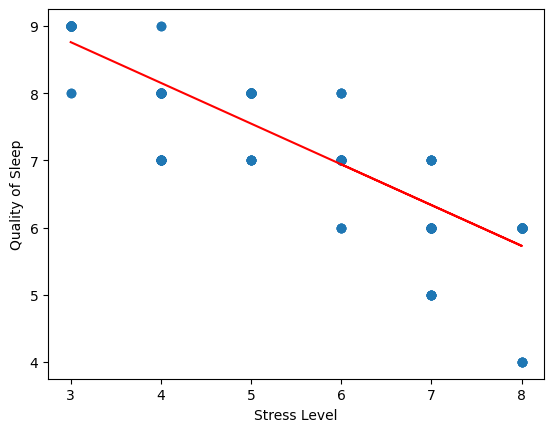

In [ ]:
import sklearn
from sklearn import linear_model

x = dataset[['Stress Level']]
y = dataset[['Quality of Sleep']]

linear = linear_model.LinearRegression()

linear.fit(x, y)

y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red')

plt.scatter(x, y)
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

Kako nam linearna regresija daje pravu oblika $y = ax + b$ koja najbolje odgovara našim podacima, izračunajmo vrijednosti koeficijenata $a$ i $b$.

In [ ]:
import numpy as np

x = dataset['Stress Level']
y = dataset['Quality of Sleep']

coefficients = np.polyfit(x, y, 1)

a = coefficients[0]  # koeficijent pravca
b = coefficients[1]  # odsječak na y-osi

print(f"Koeficijent a: {a}")
print(f"Koeficijent b: {b}")

Koeficijent a: -0.6062274064158949
Koeficijent b: 10.577385017437475


Dakle, jednačina prave koja predstavlja matematički model linearne regresije varijabli 'Stress Level' i 'Quality of Sleep' iz našeg dataseta je:
$$y = -0.6062274064158949x + 10.577385017437475$$

Zaključno, linearni regresijski model s jednačinom $y = -0.606x + 10.577$ pokazuje snažnu povezanost između nezavisne varijable ('Stress Level') i zavisne varijable ('Quality of Sleep'). Vrijednost $R^2$ od 0.808 ukazuje da se otprilike 80.8% varijacije zavisne varijable može objasniti linearnom vezom s nezavisnom varijablom. Visoka vrijednost $R^2$ ukazuje da je linearni regresijski model dobro prilagođen za podatke.

Nagib linije regresije je negativan, što ukazuje na suprotan trend između nezavisne i zavisne varijable. Kako razina stresa raste, kvaliteta sna ima tendenciju da opada.

Iako postoje odstupanja ili rasipanja tački oko linije regresije, većina prati pravac linije. To upućuje na to da model dobro opisuje opći uzorak i smjer podataka. Ipak, mogu postojati faktori koji uzrokuju odstupanja pojedinih instanci od modela.

Važno je napomenuti da zbog ovakvog neujednačenog rasporeda tačaka oko linearne funkcije, pouzdanost predikcija modela može biti ograničena.